In [1]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 5.6 MB/s eta 0:00:0000:0100:01


In [ ]:
#
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [2]:

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
 #plot bert architecture


# DF diagnosis

In [4]:
#import the raw data
df_diagnosis = pd.read_csv('data/raw/nlp/mimic/ADMISSIONS.csv')
df_diagnosis.head()

ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN           CATHOLIC   
2           HOME HEALTH CARE  Medicare     ENGL           CATHOLIC   
3                       HOME   Private      NaN  PROTESTANT QUAKER   
4                       HOME   Private      NaN       UNOBTAINABLE   

  MARITAL_STATUS ETHNICITY            EDREGTIME            EDOUTTIME  \
0        MARRIED     WHITE  2196-04-09 10:06:00  2196-04-09 13:24:00   
1        MARRIED     WHITE                  NaN                  NaN   
2        MARRIED     WHITE                  NaN                  NaN   
3         SINGLE     WHITE                  NaN                  NaN   
4        MARRIED     WHITE  2160-11-02 01:01:00  2160-11-02 04:27:00   

                                           DIAGNOSIS  HOSPITAL_EXPIRE_FLAG  \
0                            BENZODIAZEPINE OVERDOSE                     0   
1  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                     0   
2                                         BRAIN MASS                     0   
3                     INTERIOR MYOCARDIAL INFARCTION                     0   
4                            ACUTE CORONARY SYNDROME                     0   

   HAS_CHARTEVENTS_DATA  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [5]:
#get the number of unique patients
df_diagnosis['SUBJECT_ID'].nunique()


46520

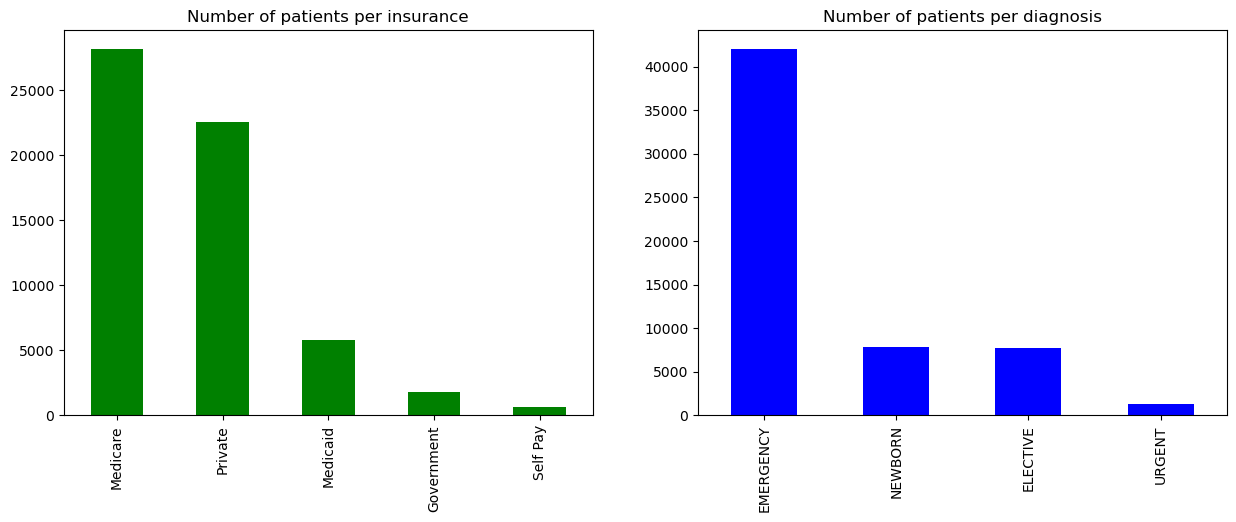

In [16]:
#plot the number of patients per diagnosis and insurance
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_diagnosis['INSURANCE'].value_counts().plot(kind='bar', ax=ax[0], title='Number of patients per insurance', color='green')
df_diagnosis['ADMISSION_TYPE'].value_counts().plot(kind='bar', ax=ax[1], title='Number of patients per diagnosis', color='blue')

plt.show()



In [19]:
#total number of ethnicity
df_diagnosis['ETHNICITY'].nunique() # 41
df_diagnosis['ETHNICITY'].value_counts().head(10)


WHITE                             40996
BLACK/AFRICAN AMERICAN             5440
UNKNOWN/NOT SPECIFIED              4523
HISPANIC OR LATINO                 1696
OTHER                              1512
ASIAN                              1509
UNABLE TO OBTAIN                    814
PATIENT DECLINED TO ANSWER          559
ASIAN - CHINESE                     277
HISPANIC/LATINO - PUERTO RICAN      232
Name: ETHNICITY, dtype: int64

<AxesSubplot:title={'center':'Number of patients per marital status'}, ylabel='MARITAL_STATUS'>

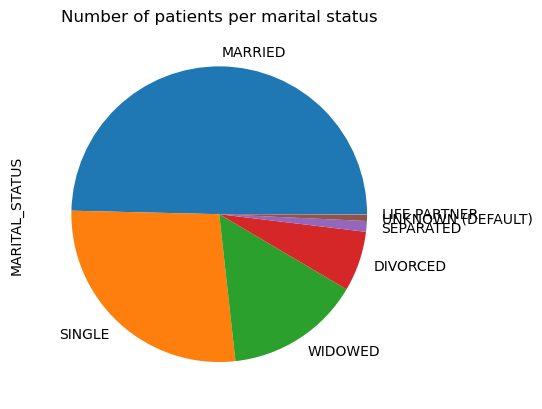

In [27]:
#plot marutal status pretty small
    
# how many ethnicities make up 90% of the data
test = df_diagnosis.groupby('ETHNICITY').count().sort_values(by='SUBJECT_ID', ascending=False).cumsum().head(10) 
test

df_diagnosis['MARITAL_STATUS'].value_counts().plot(kind='pie', title='Number of patients per marital status')

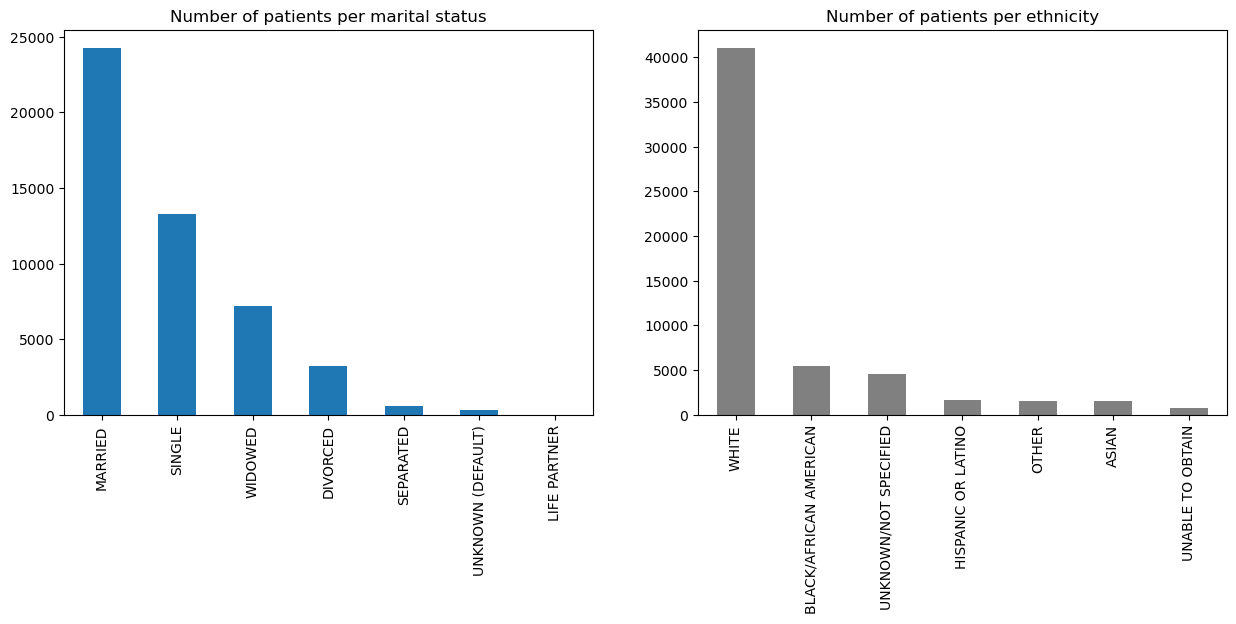

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_diagnosis['MARITAL_STATUS'].value_counts().plot(kind='bar', ax=ax[0], title='Number of patients per marital status')
#df_diagnosis['MARITAL_STATUS'].value_counts().plot(kind='pie', ax=ax[0], title='Number of patients per marital status')
df_diagnosis['ETHNICITY'].value_counts().head(7).plot(kind='bar', ax=ax[1], title='Number of patients per ethnicity', color='grey')
plt.show()

In [ ]:
#marital status and ethnicity
fig, ax = plt.subplots(1,2, figsize=(15,5))
df_diagnosis['MARITAL_STATUS'].value_counts().plot(kind='bar', ax=ax[0], title='Number of patients per marital status', color='green')
df_diagnosis    

In [23]:
# show average stay per diagnosis
#fist calculate the stay
#first convert to datetime
df_diagnosis['ADMITTIME'] = pd.to_datetime(df_diagnosis['ADMITTIME'])
df_diagnosis['DISCHTIME'] = pd.to_datetime(df_diagnosis['DISCHTIME'])
df_diagnosis['stay'] = df_diagnosis['DISCHTIME'] - df_diagnosis['ADMITTIME']
df_diagnosis.head(3)

ROW_ID  SUBJECT_ID  HADM_ID           ADMITTIME           DISCHTIME  \
0      21          22   165315 2196-04-09 12:26:00 2196-04-10 15:54:00   
1      22          23   152223 2153-09-03 07:15:00 2153-09-08 19:10:00   
2      23          23   124321 2157-10-18 19:34:00 2157-10-25 14:00:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

          DISCHARGE_LOCATION INSURANCE LANGUAGE      RELIGION MARITAL_STATUS  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN  UNOBTAINABLE        MARRIED   
1           HOME HEALTH CARE  Medicare      NaN      CATHOLIC        MARRIED   
2           HOME HEALTH CARE  Medicare     ENGL      CATHOLIC        MARRIED   

  ETHNICITY            EDREGTIME            EDOUTTIME  \
0     WHITE  2196-04-09 10:06:00  2196-04-09 13:24:00   
1     WHITE                  NaN                  NaN   
2     WHITE                  NaN                  NaN   

                                           DIAGNOSIS  HOSPITAL_EXPIRE_FLAG  \
0                            BENZODIAZEPINE OVERDOSE                     0   
1  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                     0   
2                                         BRAIN MASS                     0   

   HAS_CHARTEVENTS_DATA            stay  
0                     1 1 days 03:28:00  
1                     1 5 days 11:55:00  
2                     1 6 days 18:26:00

In [25]:
#convert stay to days
df_diagnosis['stay'] = df_diagnosis['stay'].dt.days


In [26]:
#show the average, variance stay per diagnosis
df_stay =df_diagnosis.groupby('ADMISSION_TYPE')['stay'].agg(['mean', 'var', 'std'])
df_stay 


mean         var        std
ADMISSION_TYPE                                  
ELECTIVE         8.563717  103.990294  10.197563
EMERGENCY        9.469397  118.663284  10.893268
NEWBORN         11.030777  392.800630  19.819199
URGENT          11.740269  173.933239  13.188375

9.610672137818774
6.0
0    4
Name: stay, dtype: int64


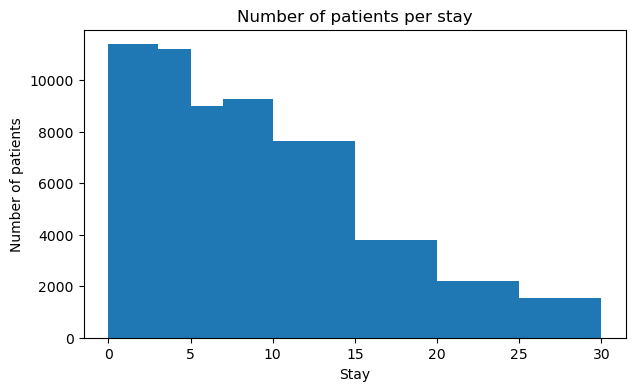

In [33]:
#overall average of stay
print(df_diagnosis['stay'].mean()) # 4.5 days
print(df_diagnosis['stay'].median())      
print(df_diagnosis['stay'].mode()) # 3 days
# plot the number of different stays in bins x between 0 and 30
# Creating histogram
fig, ax = plt.subplots(figsize =(7, 4))
bins = [0, 3, 5, 7, 10, 15, 20, 25, 30]
ax.hist(df_diagnosis['stay'], bins = bins)
# add title and axis names
plt.title('Number of patients per stay')
plt.xlabel('Stay')
plt.ylabel('Number of patients')
# show plot
 
# Show plot
plt.show()


# Noteevents table

In [38]:
#mimic processed
df_diagnoes_processed = pd.read_csv('data/processed/mimic_iii/diagnoses_noteevents_cleaned.csv')
df_diagnoes_processed.head()

TEXT  \
0  Admission Date:  [**2141-9-18**]              ...   
1  Admission Date:  [**2187-9-19**]              ...   
2  Admission Date:  [**2190-6-5**]       Discharg...   
3  Admission Date:  [**2101-4-30**]              ...   
4  Admission Date:  [**2146-9-15**]              ...   

                      specialty  \
0     Cardiothoracic & Vascular   
1          Emergency Department   
2          Emergency Department   
3  Infectious Disease Specialty   
4     Cardiothoracic & Vascular   

                                          TEXT_final  \
0  :\nhip pain\n\n:\n24yo woman with hx SLE, CKD(...   
1  :\ns/p Motor cycle crash; left sided rib pain\...   
2                                                NaN   
3  :\nOSH transfer for sepsis\n\n:\n75 y/o M with...   
4  :\nChest Pain, Abdominal Pain, Nausea/Vomiting...   

                                  TEXT_final_cleaned  
0  hip pain woman hx SLE CKD currently HD PD labi...  
1  Motor cycle crash left sided rib pain driver h...  
2                                                NaN  
3  sepsis hx type DM ESRD failed renal tx HD mont...  
4  Chest Pain Abdominal Pain Nausea Vomiting Righ...

<AxesSubplot:title={'center':'Number of patients per specialty'}>

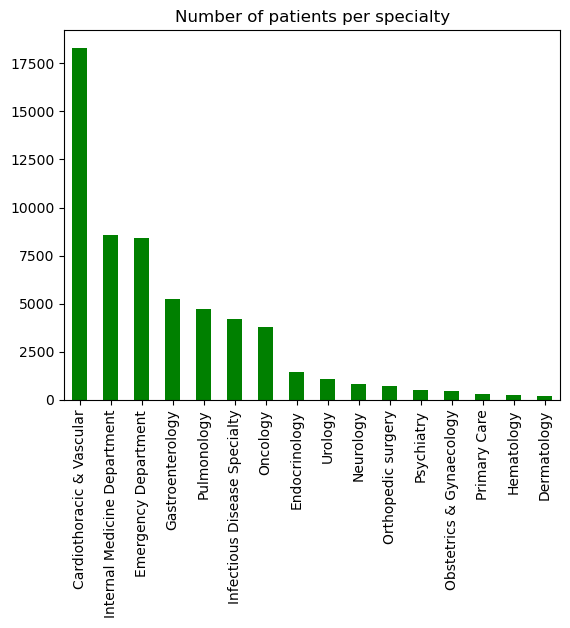

: 

In [39]:
#visualize number of specialties
df_diagnoes_processed['specialty'].value_counts().plot(kind='bar', title='Number of patients per specialty', color='green')


# Exploration keybert

In [1]:
import pandas as pd

#  Exploration Keybert mtsamples

In [2]:
#load final mimic data
df_mtsamples_TC = pd.read_csv('data/processed/nlp/mtsamples/mtsamples_TC.csv')
df_mtsamples_MLM = pd.read_csv('data/processed/nlp/mtsamples/mtsamples_MLM.csv')
#merge them on  index, desription. medical_specialty, sample name 
df_mtsamples = pd.merge(df_mtsamples_TC, df_mtsamples_MLM, on=['Unnamed: 0', 'description', 'medical_specialty', 'sample_name'])
df_mtsamples.head()


Unnamed: 0                                        description  \
0           3                             2-D M-Mode. Doppler.     
1           4                                 2-D Echocardiogram   
2           7                                 2-D Echocardiogram   
3           9                         Echocardiogram and Doppler   
4          11   Normal left ventricle, moderate biatrial enla...   

             medical_specialty               sample_name  \
0   Cardiovascular / Pulmonary   2-D Echocardiogram - 1    
1   Cardiovascular / Pulmonary   2-D Echocardiogram - 2    
2   Cardiovascular / Pulmonary   2-D Echocardiogram - 3    
3   Cardiovascular / Pulmonary   2-D Echocardiogram - 4    
4   Cardiovascular / Pulmonary              2-D Doppler    

                                     transcription_x  \
0  mode leave atrial enlargement leave atrial dia...   
1  leave ventricular cavity size wall thickness n...   
2  echocardiogram multiple view heart great vesse...   
3  description normal cardiac chamber size normal...   
4  study mild aortic stenosis widely calcify mini...   

                                          keywords_x  \
0  cardiovascular / pulmonary, 2-d m-mode, dopple...   
1  cardiovascular / pulmonary, 2-d, doppler, echo...   
2  cardiovascular / pulmonary, 2-d echocardiogram...   
3  cardiovascular / pulmonary, ejection fraction,...   
4  cardiovascular / pulmonary, 2-d study, doppler...   

                                     keywords_list_x  nr_candidates_x  \
0  ['cardiovascular / pulmonary', ' 2-d m-mode', ...               19   
1  ['cardiovascular / pulmonary', ' 2-d', ' doppl...               26   
2  ['cardiovascular / pulmonary', ' 2-d echocardi...               26   
3  ['cardiovascular / pulmonary', ' ejection frac...               20   
4  ['cardiovascular / pulmonary', ' 2-d study', '...               24   

   top_n_x                         transcription_f_TC_weights  \
0       13  [('diastolic', 0.7932), ('pericardial', 0.7386...   
1       18  [('hyperdynamic', 0.811), ('outflow', 0.7609),...   
2       18  [('echocardiogram', 0.8648), ('intracardiac', ...   
3       14  [('intracardiac', 0.8141), ('lv', 0.7467), ('p...   
4       17  [('hypertrophy', 0.7729), ('tricuspid', 0.7061...   

                                  transcription_f_TC  \
0  ['diastolic', 'pericardial', 'lv', 'effusion',...   
1  ['hyperdynamic', 'outflow', 'dilate', 'ventric...   
2  ['echocardiogram', 'intracardiac', 'outflow', ...   
3  ['intracardiac', 'lv', 'pericardial', 'tricusp...   
4  ['hypertrophy', 'tricuspid', 'study', 'ventric...   

                                     transcription_y  \
0  mode leave atrial enlargement leave atrial dia...   
1  leave ventricular cavity size wall thickness n...   
2  echocardiogram multiple view heart great vesse...   
3  description normal cardiac chamber size normal...   
4  study mild aortic stenosis widely calcify mini...   

                                          keywords_y  \
0  cardiovascular / pulmonary, 2-d m-mode, dopple...   
1  cardiovascular / pulmonary, 2-d, doppler, echo...   
2  cardiovascular / pulmonary, 2-d echocardiogram...   
3  cardiovascular / pulmonary, ejection fraction,...   
4  cardiovascular / pulmonary, 2-d study, doppler...   

                                     keywords_list_y  nr_candidates_y  \
0  ['cardiovascular / pulmonary', ' 2-d m-mode', ...               19   
1  ['cardiovascular / pulmonary', ' 2-d', ' doppl...               26   
2  ['cardiovascular / pulmonary', ' 2-d echocardi...               26   
3  ['cardiovascular / pulmonary', ' ejection frac...               20   
4  ['cardiovascular / pulmonary', ' 2-d study', '...               24   

   top_n_y                        transcription_f_MLM_weights  \
0       13  [('ventricle', 0.8142), ('regurgitation', 0.80...   
1       18  [('ventricle', 0.8222), ('obliteration', 0.812...   
2       18  [('echocardiogram', 0.8317), ('intracardiac', ...   
3       14  [('intr

In [30]:
df_mtsamples_TC.head()
# get average number of characters in transcription column
df_mtsamples_TC['transcription'].str.len().mean() #  1,000 characters
# get size of df
df_mtsamples_TC.shape # 1,000,000 rows
#count medical specialty surgery
df_mtsamples_TC['medical_specialty'].value_counts().head(10)

 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
Name: medical_specialty, dtype: int64

In [3]:
df_mtsamples_f = df_mtsamples[['medical_specialty','transcription_x', 'nr_candidates_y','top_n_y', 'transcription_f_TC_weights','transcription_f_TC',  'transcription_f_MLM_weights', 'transcription_f_MLM']]

#drop nan
df_mtsamples_f = df_mtsamples_f.dropna()
df_mtsamples_f.head()

medical_specialty  \
0   Cardiovascular / Pulmonary   
1   Cardiovascular / Pulmonary   
2   Cardiovascular / Pulmonary   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                     transcription_x  nr_candidates_y  \
0  mode leave atrial enlargement leave atrial dia...               19   
1  leave ventricular cavity size wall thickness n...               26   
2  echocardiogram multiple view heart great vesse...               26   
3  description normal cardiac chamber size normal...               20   
4  study mild aortic stenosis widely calcify mini...               24   

   top_n_y                         transcription_f_TC_weights  \
0       13  [('diastolic', 0.7932), ('pericardial', 0.7386...   
1       18  [('hyperdynamic', 0.811), ('outflow', 0.7609),...   
2       18  [('echocardiogram', 0.8648), ('intracardiac', ...   
3       14  [('intracardiac', 0.8141), ('lv', 0.7467), ('p...   
4       17  [('hypertrophy', 0.7729), ('tricuspid', 0.7061...   

                                  transcription_f_TC  \
0  ['diastolic', 'pericardial', 'lv', 'effusion',...   
1  ['hyperdynamic', 'outflow', 'dilate', 'ventric...   
2  ['echocardiogram', 'intracardiac', 'outflow', ...   
3  ['intracardiac', 'lv', 'pericardial', 'tricusp...   
4  ['hypertrophy', 'tricuspid', 'study', 'ventric...   

                         transcription_f_MLM_weights  \
0  [('ventricle', 0.8142), ('regurgitation', 0.80...   
1  [('ventricle', 0.8222), ('obliteration', 0.812...   
2  [('echocardiogram', 0.8317), ('intracardiac', ...   
3  [('intracardiac', 0.8333), ('pericardial', 0.8...   
4  [('ventricle', 0.8089), ('regurgitation', 0.80...   

                                 transcription_f_MLM  
0  ['ventricle', 'regurgitation', 'pericardial', ...  
1  ['ventricle', 'obliteration', 'ventricular', '...  
2  ['echocardiogram', 'intracardiac', 'trileaflet...  
3  ['intracardiac', 'pericardial', 'regurgitation...  
4  ['ventricle', 'regurgitation', 'stenosis', 'hy...

In [73]:
#get types
#df_mtsamples_f.transcription_x dtype('O') to string
#df_mtsamples_f['transcription_x'].dtype # object but we want string


df_mtsamples_f['transcription_x'] = df_mtsamples_f['transcription_x'].astype('string')
df_mtsamples_f['transcription_x'].dtype


string[python]

In [75]:
len(df_mtsamples_f['transcription_x'])

3010

In [79]:
# average lenght, min, max of transcription_x for each medical specialty
#get the average lenght of the transcription
df_g = df_mtsamples_f.copy()
#literal_eval(df_g['transcription_x'])  # convert string to list    
#df_g['transcription_x'] = df_g['transcription_x'].apply(lambda x: literal_eval(x))
#df_g['transcription_x'] = df_g['transcription_x'].astype(str)
df_g['transcription_coundt'] = df_g['transcription_x'].apply(lambda x: len(x))
df_g = df_g.groupby('medical_specialty')['transcription_coundt'].mean() # 1,000 characters

df_g

medical_specialty
 Cardiovascular / Pulmonary       494.410714
 Consult - History and Phy.       503.598291
 Gastroenterology                 490.451282
 General Medicine                 505.226027
 Neurology                        498.982143
 Obstetrics / Gynecology          505.653846
 Orthopedic                       494.171617
 Radiology                        485.629482
 SOAP / Chart / Progress Notes    499.887324
 Surgery                          502.833497
 Urology                          497.585714
Name: transcription_coundt, dtype: float64

In [21]:
import ast
from ast import literal_eval

df_mtsamples_f['transcription_f_TC'] = df_mtsamples_f['transcription_f_TC_weights'].apply(lambda x: literal_eval(x))
df_mtsamples_f['transcription_f_MLM'] = df_mtsamples_f['transcription_f_MLM_weights'].apply(lambda x: literal_eval(x))
#df_mtsamples_f['transcription_f_TC_weights'] = literal_eval(df_mtsamples_f['transcription_f_TC_weights'])
df_mtsamples_f.dtypes

medical_specialty              object
transcription_x                object
nr_candidates_y                 int64
top_n_y                         int64
transcription_f_TC_weights     object
transcription_f_TC             object
transcription_f_MLM_weights    object
transcription_f_MLM            object
dtype: object

In [22]:
# transcription_f_TC to list of words only
df_mtsamples_f['transcription_f_TC'] = df_mtsamples_f['transcription_f_TC'].apply(lambda x: [i[0] for i in x])
df_mtsamples_f['transcription_f_MLM'] = df_mtsamples_f['transcription_f_TC'].apply(lambda x: [i[0] for i in x])
df_mtsamples_f.head()

medical_specialty  \
0   Cardiovascular / Pulmonary   
1   Cardiovascular / Pulmonary   
2   Cardiovascular / Pulmonary   
3   Cardiovascular / Pulmonary   
4   Cardiovascular / Pulmonary   

                                     transcription_x  nr_candidates_y  \
0  mode leave atrial enlargement leave atrial dia...               19   
1  leave ventricular cavity size wall thickness n...               26   
2  echocardiogram multiple view heart great vesse...               26   
3  description normal cardiac chamber size normal...               20   
4  study mild aortic stenosis widely calcify mini...               24   

   top_n_y                         transcription_f_TC_weights  \
0       13  [('diastolic', 0.7932), ('pericardial', 0.7386...   
1       18  [('hyperdynamic', 0.811), ('outflow', 0.7609),...   
2       18  [('echocardiogram', 0.8648), ('intracardiac', ...   
3       14  [('intracardiac', 0.8141), ('lv', 0.7467), ('p...   
4       17  [('hypertrophy', 0.7729), ('tricuspid', 0.7061...   

                                  transcription_f_TC  \
0  [diastolic, pericardial, lv, effusion, tricusp...   
1  [hyperdynamic, outflow, dilate, ventricular, w...   
2  [echocardiogram, intracardiac, outflow, venous...   
3  [intracardiac, lv, pericardial, tricuspid, eff...   
4  [hypertrophy, tricuspid, study, ventricular, s...   

                         transcription_f_MLM_weights  \
0  [('ventricle', 0.8142), ('regurgitation', 0.80...   
1  [('ventricle', 0.8222), ('obliteration', 0.812...   
2  [('echocardiogram', 0.8317), ('intracardiac', ...   
3  [('intracardiac', 0.8333), ('pericardial', 0.8...   
4  [('ventricle', 0.8089), ('regurgitation', 0.80...   

                                 transcription_f_MLM  
0            [d, p, l, e, t, a, e, s, v, d, f, t, f]  
1  [h, o, d, v, w, r, v, e, v, a, m, f, f, d, s, ...  
2  [e, i, o, v, h, p, a, e, f, r, v, i, c, t, v, ...  
3         [i, l, p, t, e, v, e, t, f, d, c, s, c, f]  
4  [h, t, s, v, s, h, w, m, v, b, f, d, s, r, m, ...

In [24]:
df_mtsamples_f.head()
#type of each column
df_mtsamples_f.dtypes
# create transcription_f_TC_weights, transcription_f_MLM_weights as list with ast.literal_eval(node_or_string)
import ast
from ast import literal_eval
df_mtsamples_f['transcription_f_TC_weights'] = literal_eval(df_mtsamples_f['transcription_f_TC_weights'])#.apply(lambda x: literal_eval(x))
#df_mtsamples_f['transcription_f_TC_weights'] = df_mtsamples_f['transcription_f_TC_weights'].apply(lambda x: literal_eval(x))
#df_mtsamples_f['transcription_f_MLM_weights'] = df_mtsamples_f['transcription_f_MLM_weights'].apply(lambda x: literal_eval(x))

#df_mtsamples_f['transcription_f_TC'] = df_mtsamples_f['transcription_f_TC_weights'].apply(lambda x: literal_eval(x))
#df_mtsamples_f['transcription_f_MLM'] = df_mtsamples_f['transcription_f_MLM_weights'].apply(lambda x: literal_eval(x))
df_mtsamples_f.dtypes

ValueError: malformed node or string: 0                                                                                                                             [(diastolic, 0.7932), (pericardial, 0.7386), (lv, 0.7376), (effusion, 0.7121), (tricuspid, 0.7093), (atrial, 0.6654), (ejection, 0.6454), (systolic, 0.6446), (ventricle, 0.6321), (doppler, 0.6316), (function, 0.6257), (trace, 0.6224), (fraction, 0.604)]
1                               [(hyperdynamic, 0.811), (outflow, 0.7609), (dilate, 0.7456), (ventricular, 0.7223), (wall, 0.7021), (relaxation, 0.682), (ventricle, 0.6719), (ejection, 0.6668), (va, 0.6611), (atrium, 0.6546), (mildly, 0.6497), (function, 0.641), (fraction, 0.6403), (doppler, 0.6351), (systolic, 0.6179), (gradient, 0.615), (mid, 0.5974), (obliteration, 0.5928)]
2            [(echocardiogram, 0.8648), (intracardiac, 0.8147), (outflow, 0.7424), (venous, 0.7312), (hypertrophy, 0.7034), (pericardial, 0.7023), (arteries, 0.6919), (effusion, 0.6873), (flow, 0.6682), (reveal, 0.6524), (vegetations, 0.6511), (interatrial, 0.6509), (coronary, 0.6438), (tricuspid, 0.6436), (vessels, 0.6435), (heart, 0.6303), (doppler, 0.6113), (color, 0.6097)]
3                                                                                                    [(intracardiac, 0.8141), (lv, 0.7467), (pericardial, 0.7303), (tricuspid, 0.7119), (effusion, 0.7035), (ventricular, 0.6785), (ejection, 0.6527), (trace, 0.6378), (function, 0.6372), (doppler, 0.633), (cardiac, 0.6265), (systolic, 0.6201), (chamber, 0.6144), (fraction, 0.6125)]
4                                 [(hypertrophy, 0.7729), (tricuspid, 0.7061), (study, 0.7058), (ventricular, 0.701), (stenosis, 0.6866), (heart, 0.6831), (widely, 0.6812), (minimally, 0.657), (ventricle, 0.647), (biatrial, 0.6378), (function, 0.6318), (doppler, 0.6206), (systolic, 0.6197), (regurgitation, 0.5974), (moderate, 0.5624), (pressure, 0.5573), (enlargement, 0.5489)]
                                                                                                                                                                                               ...                                                                                                                                                                                         
3005          [(coronary, 0.7656), (angiogram, 0.7607), (main, 0.7387), (diagonals, 0.693), (angiographically, 0.6803), (artery, 0.6565), (stenosis, 0.6525), (heart, 0.6353), (common, 0.6336), (sheath, 0.6243), (dise, 0.5963), (rest, 0.5928), (septal, 0.5845), (abnormal, 0.5841), (catheters, 0.5734), (cath, 0.5549), (jr, 0.5514), (test, 0.5383), (large, 0.5278), (apex, 0.507)]
3006                   [(coronary, 0.8538), (myocardial, 0.7974), (main, 0.7402), (catheterization, 0.7346), (ventricular, 0.7217), (angiography, 0.6962), (emergent, 0.667), (heart, 0.6538), (circumflex, 0.6378), (angioplasty, 0.6351), (artery, 0.61), (totally, 0.5859), (rca, 0.5801), (infarction, 0.5775), (failure, 0.5342), (right, 0.5277), (require, 0.5069), (death, 0.5067)]
3007      [(angina, 0.797), (thyroid, 0.7778), (men, 0.72), (eat, 0.717), (disease, 0.7154), (heart, 0.7106), (oxygen, 0.7038), (diabetes, 0.6922), (anemia, 0.6838), (stress, 0.6616), (chest, 0.6498), (healthy, 0.6471), (pain, 0.6417), (smoke, 0.6291), (occur, 0.6141), (mellitus, 0.6093), (exer, 0.5946), (lot, 0.5886), (underlie, 0.5849), (breast, 0.571), (overweight, 0.5696)]
3008                   [(myocardial, 0.7601), (treadmill, 0.7556), (tracer, 0.7428), (reveal, 0.6544), (demonstrate, 0.6486), (ekg, 0.6419), (distribution, 0.6397), (heart, 0.6371), (chest, 0.6282), (homogeneous, 0.5918), (nuclear, 0.5818), (nondiagnostic, 0.5753), (intravenously, 0.5708), (perfusion, 0.5695), (stress, 0.5678), (rest, 0.5541), (rhythm, 0.5538), (image, 0.552)]
3009    [(ischemia, 0.8005), (lv, 0.7493), (main, 0.7474), (coronary, 0.712), (apical, 0.6997), (chest, 0.692), (exercise, 0.6757), (stenosis, 0.6638), (catheterization, 0.661), (artery, 0.6393), (bruce, 0.6348), (cardiac, 0.6297), (function, 0.6151), (abnormal, 0.608), (distal, 0.5942), (circumflex, 0.5848), (image, 0.5755), (markedly, 0.5721), (mr, 0.5469), (lesion, 0.5343)]
Name: transcription_f_TC_weights, Length: 3010, dtype: object

In [15]:
for specialty in df_mtsamples_f['medical_specialty'].unique():
    text = df_mtsamples_f[df_mtsamples_f['medical_specialty'] == specialty]['transcription_f_TC']
    print(text)

0       [diastolic, pericardial, lv, effusion, tricusp...
1       [hyperdynamic, outflow, dilate, ventricular, w...
2       [echocardiogram, intracardiac, outflow, venous...
3       [intracardiac, lv, pericardial, tricuspid, eff...
4       [hypertrophy, tricuspid, study, ventricular, s...
                              ...                        
3005    [coronary, angiogram, main, diagonals, angiogr...
3006    [coronary, myocardial, main, catheterization, ...
3007    [angina, thyroid, men, eat, disease, heart, ox...
3008    [myocardial, treadmill, tracer, reveal, demons...
3009    [ischemia, lv, main, coronary, apical, chest, ...
Name: transcription_f_TC, Length: 280, dtype: object
6      [vasectomy, sterilization, genitalia, sterilel...
8      [region, uptake, magnetic, abnormal, brain, sc...
9      [scrotal, testicular, incision, sterile, drape...
10     [vasectomy, hemiscrotum, scrotal, sterility, d...
11     [vasectomy, scrotal, incision, sterile, clamp,...
                        

In [5]:
print(os.getcwd())

/Users/tara-sophiatumbraegel/UNI/masterthesis/NLP_Masterthesis


 Cardiovascular / Pulmonary


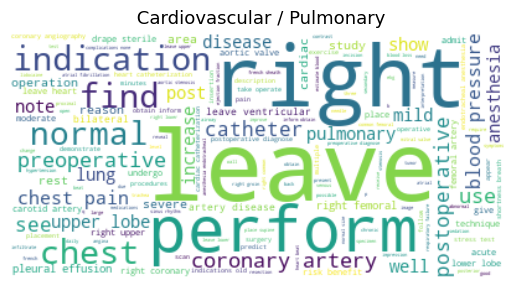

 Urology


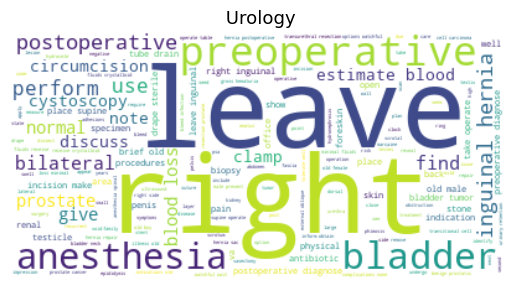

 General Medicine


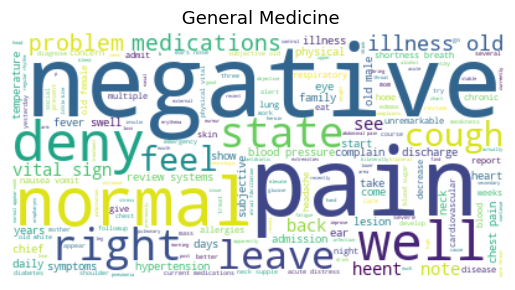

 Surgery


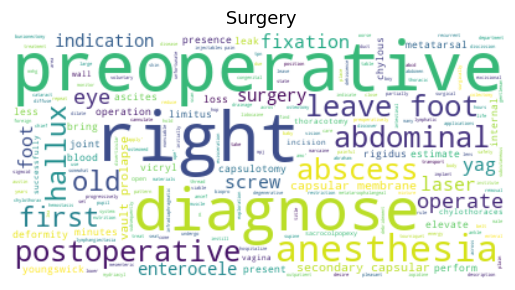

 SOAP / Chart / Progress Notes


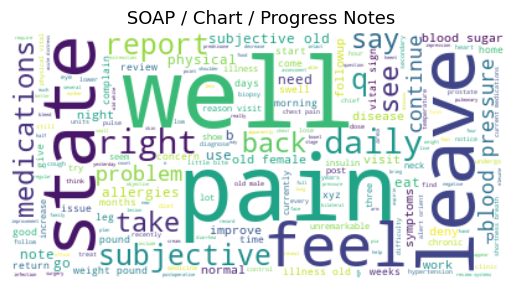

 Radiology


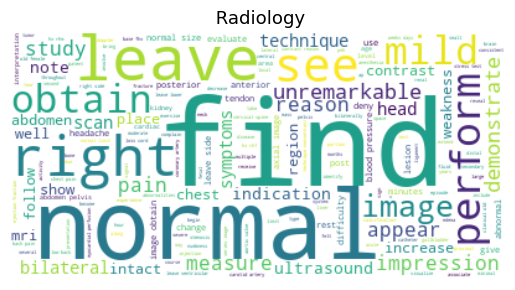

 Orthopedic


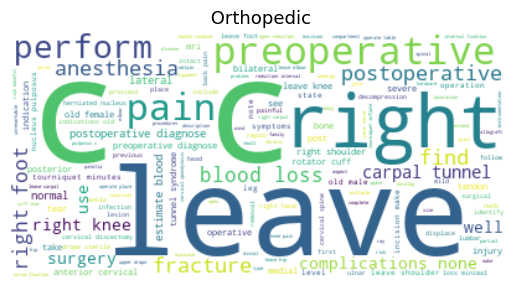

 Obstetrics / Gynecology


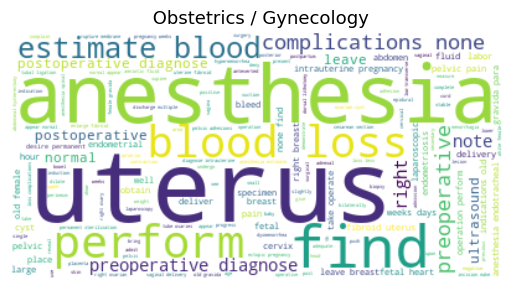

 Neurology


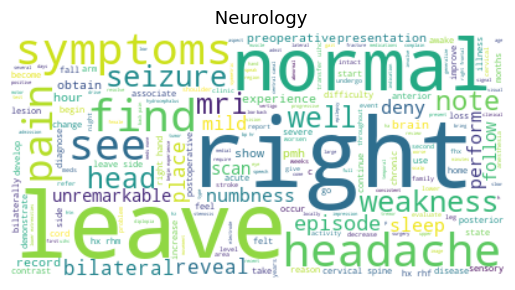

 Gastroenterology


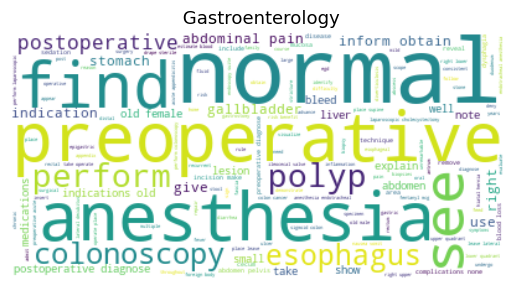

 Consult - History and Phy.


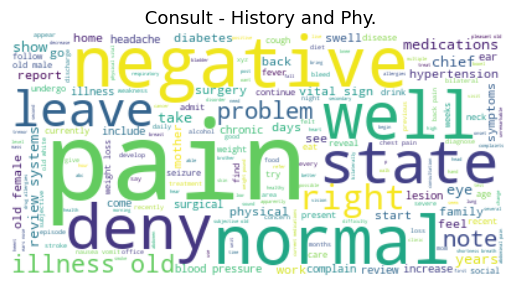

In [7]:
#for cleaned dataset
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
#create for each specialty a wordcloud
for specialty in df_mtsamples_f['medical_specialty'].unique():
    print(specialty)
    # create list of words to one string for transcription_f_TC
    # make transcription_f_TC a string
    #text = df_mtsamples_f[df_mtsamples_f['medical_specialty    == specialty]]['transcription_f_TC']

    text = df_mtsamples_f[df_mtsamples_f['medical_specialty'] == specialty]['transcription_x'].values
    # Create and generate a word cloud image:
    #make a white backround for wordcloud
    #create header for wordcloud


    wordcloud = WordCloud(background_color='white').generate(str(text))#" ".join(text))
    # Display the generated image:
    plt.title(specialty, fontsize=13)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
# for final dataset

 Cardiovascular / Pulmonary


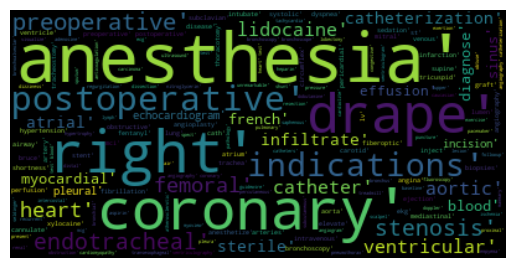

 Urology


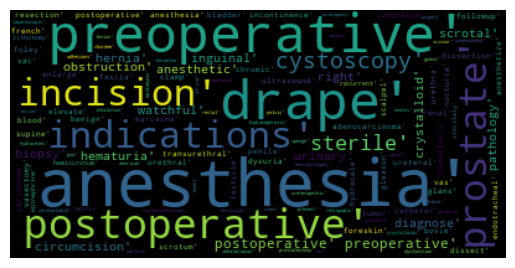

 General Medicine


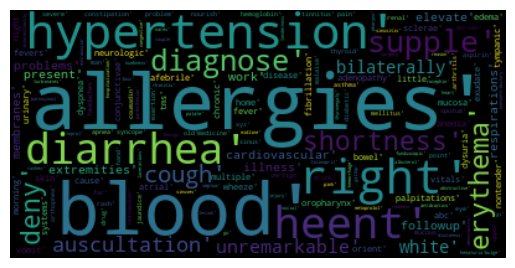

 Surgery


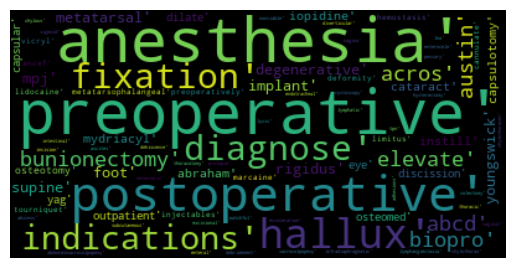

 SOAP / Chart / Progress Notes


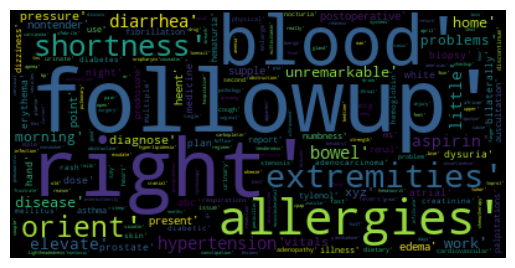

 Radiology


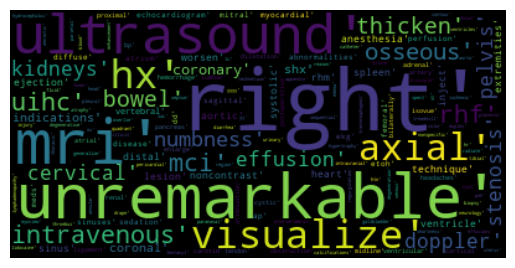

 Orthopedic


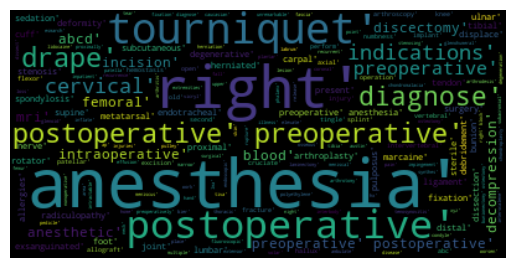

 Obstetrics / Gynecology


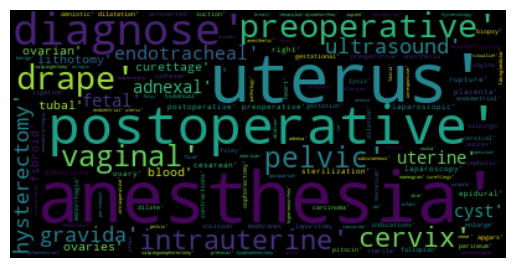

 Neurology


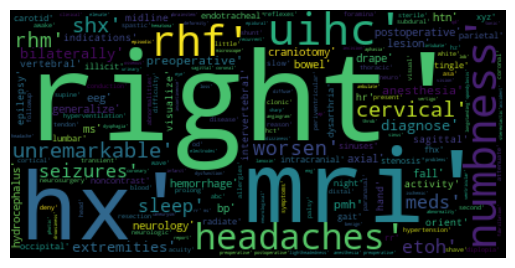

 Gastroenterology


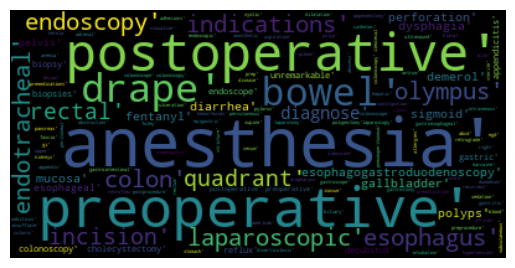

 Consult - History and Phy.


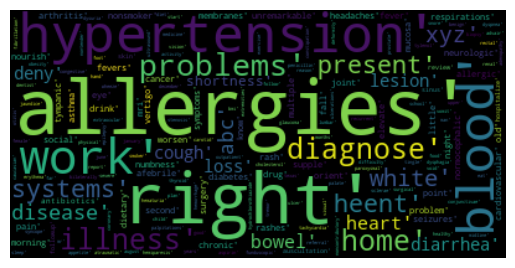

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
#create for each specialty a wordcloud
for specialty in df_mtsamples_f['medical_specialty'].unique():
    print(specialty)
    # create list of words to one string for transcription_f_TC
    # make transcription_f_TC a string
    #text = df_mtsamples_f[df_mtsamples_f['medical_specialty    == specialty]]['transcription_f_TC']

    text = df_mtsamples_f[df_mtsamples_f['medical_specialty'] == specialty]['transcription_f_MLM'].values
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(str(text))#" ".join(text))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

 Cardiovascular / Pulmonary
[list(['diastolic', 'pericardial', 'lv', 'effusion', 'tricuspid', 'atrial', 'ejection', 'systolic', 'ventricle', 'doppler', 'function', 'trace', 'fraction'])
 list(['hyperdynamic', 'outflow', 'dilate', 'ventricular', 'wall', 'relaxation', 'ventricle', 'ejection', 'va', 'atrium', 'mildly', 'function', 'fraction', 'doppler', 'systolic', 'gradient', 'mid', 'obliteration'])
 list(['echocardiogram', 'intracardiac', 'outflow', 'venous', 'hypertrophy', 'pericardial', 'arteries', 'effusion', 'flow', 'reveal', 'vegetations', 'interatrial', 'coronary', 'tricuspid', 'vessels', 'heart', 'doppler', 'color'])
 list(['intracardiac', 'lv', 'pericardial', 'tricuspid', 'effusion', 'ventricular', 'ejection', 'trace', 'function', 'doppler', 'cardiac', 'systolic', 'chamber', 'fraction'])
 list(['hypertrophy', 'tricuspid', 'study', 'ventricular', 'stenosis', 'heart', 'widely', 'minimally', 'ventricle', 'biatrial', 'function', 'doppler', 'systolic', 'regurgitation', 'moderate', 'p

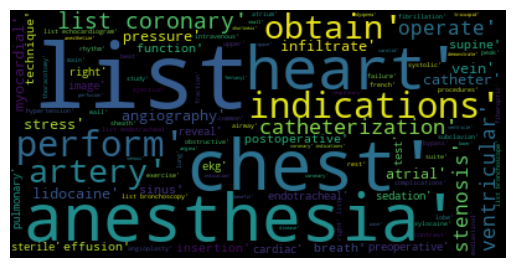

 Urology
[list(['vasectomy', 'sterilization', 'genitalia', 'sterilely', 'drape', 'preoperative', 'shave', 'solution', 'satisfactory', 'proceed', 'supine', 'complications', 'scrub', 'anesthesia', 'family', 'obtain', 'place', 'office'])
 list(['region', 'uptake', 'magnetic', 'abnormal', 'brain', 'scan', 'prostate', 'resonance', 'technetium', 'urinary', 'conclusion', 'projections', 'parietal', 'normal', 'mci', 'retention', 'suggest', 'skull'])
 list(['scrotal', 'testicular', 'incision', 'sterile', 'drape', 'scissor', 'scalpel', 'clamp', 'close', 'ligate', 'inspect', 'portion', 'supine', 'iris', 'anesthesia', 'manner', 'hemoclips', 'skin', 'hemostasis'])
 list(['vasectomy', 'hemiscrotum', 'scrotal', 'sterility', 'drape', 'incision', 'clamp', 'preoperative', 'cut', 'proceed', 'anesthetize', 'supine', 'surgical', 'place', 'skin', 'bring', 'standard'])
 list(['vasectomy', 'scrotal', 'incision', 'sterile', 'clamp', 'transect', 'close', 'operation', 'anesthesia', 'vicryl', 'tissue', 'apply', 'c

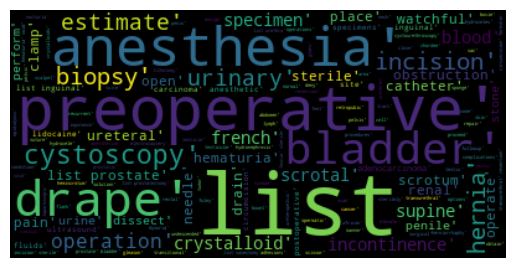

 General Medicine
[list(['asthma', 'noncontributory', 'drug', 'hypertension', 'illicit', 'allergies', 'diabetes', 'tobacco', 'medrol', 'unasyn', 'illness', 'medications', 'cataract', 'female', 'compromise', 'emergency', 'know', 'hysterectomy'])
 list(['cough', 'subjective', 'coumadin', 'diabetic', 'feel', 'months', 'fever', 'medicine', 'lasix', 'deny', 'vomit', 'breath', 'medications', 'quit', 'headache', 'zaroxolyn', 'diarrhea', 'appear', 'copd', 'albuterol'])
 list(['subjective', 'cough', 'shortness', 'throat', 'eat', 'vomit', 'night', 'hoarse', 'diarrhea', 'fever', 'allergies', 'congestion', 'sudden', 'bilaterally', 'noncontributory', 'home', 'felt', 'appear', 'pink', 'erythema', 'exudate'])
 list(['illness'])
 list(['toothache', 'complaints', 'chill', 'home', 'vicodin', 'deny', 'constitutional', 'complain', 'appointments', 'dentist', 'dental', 'medicine', 'disease', 'oxycontin', 'regular', 'fever', 'systems', 'use', 'problems', 'standby'])
 list(['prednisone', 'basically', 'subject

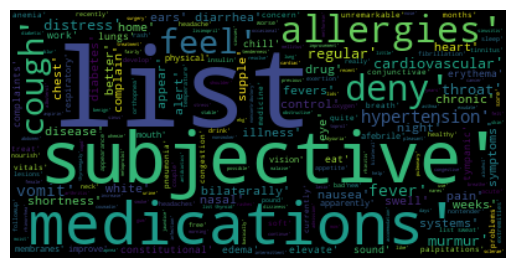

 Surgery
[list(['fixation', 'metatarsal', 'joint', 'foot', 'chief', 'implant', 'department', 'bunionectomy', 'degenerative', 'screw', 'area', 'belt', 'diagnose', 'acros', 'table', 'surgical', 'preoperative', 'present', 'painful'])
 list(['preoperative', 'capsular', 'eye', 'laser', 'lens', 'operate', 'apply', 'perform', 'position', 'yag', 'pupil', 'surgery', 'indicate', 'membrane', 'undergo'])
 list(['fixation', 'metatarsophalangeal', 'deformity', 'osteotomy', 'ankle', 'joint', 'foot', 'screw', 'osteomed', 'title', 'tourniquet', 'materials', 'postoperative', 'ope', 'set', 'plain', 'right', 'internal'])
 ...
 list(['chylothorax', 'mesenteric', 'chylothoraces', 'ascites', 'anesthesia', 'exploration', 'enteral', 'intestinal', 'thoracotomy', 'indication', 'preoperative', 'chylous', 'duct', 'infradiaphragmatic', 'operate'])
 list(['colectomy', 'diverticular', 'evisceration', 'sigmoid', 'complications', 'preoperative', 'anesthesia', 'nonviable', 'abdomen', 'incision', 'subcutaneous', 'abscess

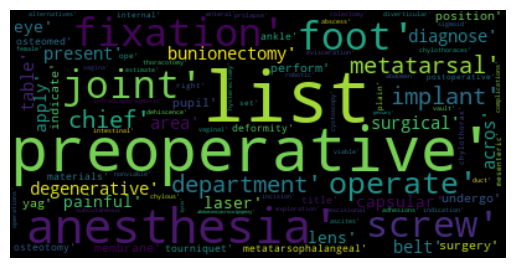

 SOAP / Chart / Progress Notes
[list(['nausea', 'months', 'headache', 'shortness', 'taxol', 'worse', 'dysuria', 'deny', 'fever', 'burn', 'chemotherapy', 'followup', 'systems', 'mole', 'carboplatin', 'little', 'uterine', 'chest', 'tingle', 'carcinoma'])
 list(['ulcerative', 'perineal', 'nausea', 'colitis', 'ostomy', 'vomit', 'erythema', 'percocet', 'intermittent', 'pain', 'good', 'fevers', 'output', 'extra', 'followup', 'drainage', 'incision', 'clinic', 'heal', 'refractory'])
 list(['palpitations', 'shortness', 'okay', 'really', 'subjective', 'help', 'breath', 'pain', 'gain', 'talk', 'pound', 'benefit', 'little', 'phentermine', 'appear', 'distress', 'continue', 'heent', 'weight', 'systems'])
 list(['feel', 'complain', 'shortness', 'subjective', 'bad', 'throat', 'swell', 'like', 'pound', 'lot', 'temperature', 'sting', 'white', 'vitals', 'anaphylaxis', 'race', 'similar', 'breath', 'anxiety', 'extremities', 'arm', 'weight'])
 list(['eoms', 'months', 'motor', 'sensation', 'legs', 'worsen', 

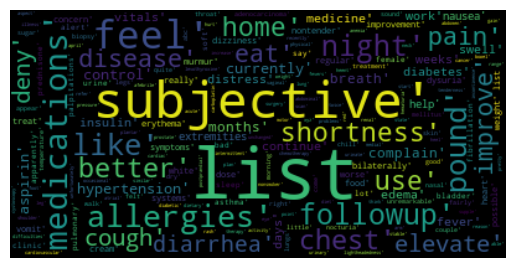

 Radiology
[list(['epididymis', 'testicles', 'testicle', 'scrotal', 'scrotum', 'hydroceles', 'hydrocele', 'ultrasound', 'duplex', 'mass', 'intratesticular', 'thicken', 'normal', 'wall', 'doppler'])
 list(['ultrasound', 'asymmetry', 'radiographs', 'hypertrophy', 'comparison', 'adenoids', 'view', 'tissue', 'appear', 'normal', 'structure', 'caliber', 'lateral', 'right', 'enlarge', 'osseous', 'frontal', 'impression', 'neck', 'grossly'])
 list(['region', 'uptake', 'magnetic', 'abnormal', 'brain', 'scan', 'prostate', 'resonance', 'technetium', 'urinary', 'conclusion', 'projections', 'parietal', 'normal', 'mci', 'retention', 'suggest', 'skull'])
 list(['fetal', 'gestational', 'uterus', 'ovary', 'intrauterine', 'feta', 'pregnant', 'pregnancy', 'yolk', 'represent', 'estimate', 'single', 'female', 'delivery', 'crown', 'sonographic', 'visualize', 'age', 'sac', 'length'])
 list(['fetal', 'placenta', 'uterus', 'cervix'])
 list(['fetal', 'gestational', 'endometrial', 'adnexal', 'cyst', 'ultrasound',

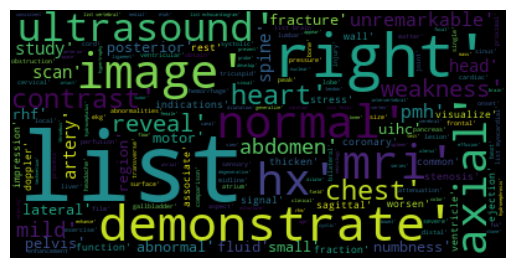

 Orthopedic
[list(['fixation', 'metatarsophalangeal', 'deformity', 'osteotomy', 'ankle', 'joint', 'foot', 'screw', 'osteomed', 'title', 'tourniquet', 'materials', 'postoperative', 'ope', 'set', 'plain', 'right', 'internal'])
 list(['fixation', 'metatarsal', 'joint', 'foot', 'chief', 'implant', 'department', 'bunionectomy', 'degenerative', 'screw', 'area', 'belt', 'diagnose', 'acros', 'table', 'surgical', 'preoperative', 'present', 'painful'])
 list(['chief'])
 list(['uninjured', 'wrist', 'ligament', 'scapholunate', 'dorsal', 'identify', 'title', 'arm', 'tourniquet', 'postoperative', 'ganglion', 'extensor', 'appropriate', 'rd', 'cl', 'make', 'origin'])
 list(['vertebroplasty', 'fracture', 'identify', 'superior', 'aspect', 'postoperative', 'summary', 'pedicle', 'projections', 'clock', 'prone', 'compression', 'trocar', 'gauge', 'transpedicular', 'unilateral', 'place', 'fluor'])
 list(['thumb', 'surgeon', 'postoperative', 'preoperative', 'release', 'apply'])
 list(['carpal', 'ulnar', 'liga

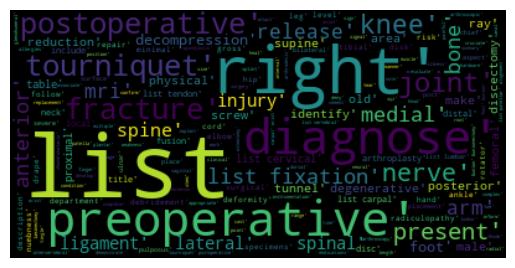

 Obstetrics / Gynecology
[list(['vaginal', 'placenta', 'fetal', 'intrauterine', 'infant', 'pregnancy', 'deliver', 'delivery', 'vacuum', 'estimate', 'minutes', 'midline', 'procedures', 'apgars', 'preoperative', 'live', 'anesthesia', 'male', 'laceration'])
 list(['vaginal', 'gravida', 'ovum', 'cervix', 'vault', 'vacuum', 'preoperative', 'straig', 'female', 'operate', 'perform', 'anesthesia', 'drape', 'form', 'supine', 'tooth', 'make', 'lithotomy', 'ultrasound', 'lip'])
 list(['vaginal', 'uterine', 'vagina', 'uterus', 'hysterectomy', 'cervix', 'manner', 'manipulation', 'laparoscopic', 'operation', 'perform', 'anesthesia', 'single', 'attach', 'description', 'bleed', 'tooth'])
 list(['fetal', 'gestational', 'uterus', 'ovary', 'intrauterine', 'feta', 'pregnant', 'pregnancy', 'yolk', 'represent', 'estimate', 'single', 'female', 'delivery', 'crown', 'sonographic', 'visualize', 'age', 'sac', 'length'])
 list(['nausea', 'months', 'headache', 'shortness', 'taxol', 'worse', 'dysuria', 'deny', 'fev

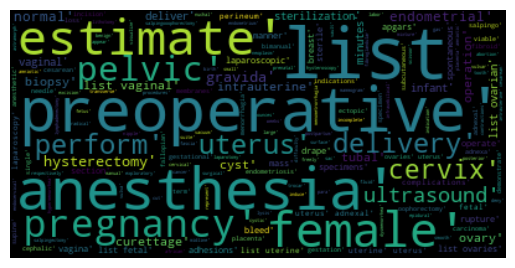

 Neurology
[list(['frontotemporal', 'epileptogenic', 'regions', 'head', 'demonstrate', 'wakefulness', 'region', 'movements', 'right', 'slow', 'involuntary', 'predominantly', 'amplitude', 'background', 'drowsiness', 'symmetric', 'attenuation'])
 list(['echocardiogram', 'breath', 'fibrillation', 'chest', 'sinus', 'rapid', 'valvular', 'atrial', 'reveal', 'wilson', 'shortness', 'palpitations', 'randolph', 'lopressor', 'rhythm', 'fraction', 'way', 'ejection'])
 list(['spindles', 'activation', 'seizures', 'stimulation', 'wake', 'elicit', 'spontaneous', 'background', 'develop', 'clinical', 'old', 'symmetric', 'drive', 'produce', 'response', 'digital', 'eeg', 'etiology', 'female'])
 list(['temporal', 'epileptic', 'epilepsy', 'activation', 'seizures', 'hz', 'wake', 'dominant', 'posterior', 'background', 'eeg', 'activity', 'old', 'single', 'digital', 'alpha', 'maximally', 'appear', 'time', 'events'])
 list(['epileptogenic', 'wakefulness', 'focal'])
 list(['saphenous', 'venous', 'endotracheal', '

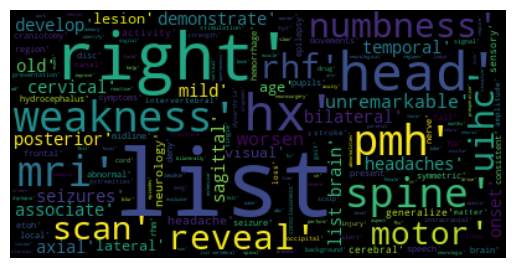

 Gastroenterology
[list(['ulcerative', 'perineal', 'nausea', 'colitis', 'ostomy', 'vomit', 'erythema', 'percocet', 'intermittent', 'pain', 'good', 'fevers', 'output', 'extra', 'followup', 'drainage', 'incision', 'clinic', 'heal', 'refractory'])
 list(['endoscope', 'endoscopy', 'esophagus', 'esophageal', 'complications', 'anesthesia', 'stomach', 'preoperative', 'postoperative', 'stoma', 'insert', 'suite', 'intubation', 'pediatric', 'reinserted', 'advance', 'mouth', 'loss'])
 list(['umbilicus', 'umbilical', 'electrocautery', 'suture', 'incision', 'sterile', 'fascia', 'scissor', 'fascial', 'lidocaine', 'anesthetic', 'hernia', 'adherent', 'drape', 'suite', 'manner', 'close', 'bovie'])
 list(['nonsmoker', 'nausea', 'vomitus', 'throat', 'deny', 'symptoms', 'cough', 'drug', 'diarrhea', 'complain', 'fever', 'night', 'home', 'medications', 'allergies', 'diaphoresis', 'fine', 'currently', 'wine', 'white', 'felt'])
 list(['esophagus', 'endoscopy', 'scope', 'perforation', 'aspiration', 'swallow', 

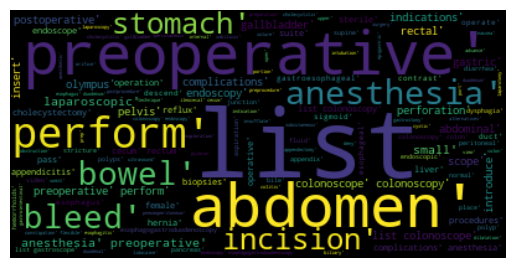

 Consult - History and Phy.
[list(['pregnancy', 'occasion', 'appearance', 'mom', 'developmental', 'wichita', 'birth', 'spit', 'age', 'subjective', 'happen', 'denver', 'prenatal', 'ounce', 'void', 'care', 'kansas', 'nonbilious', 'normal', 'projectile', 'weight'])
 list(['vision', 'daycare', 'overall', 'subjective', 'dairy', 'diet', 'dentist', 'food', 'regularly', 'mom', 'vegetables', 'grain', 'fine', 'child', 'junk', 'behavioral', 'speech', 'snack', 'visit', 'school'])
 list(['vision', 'overall', 'medications', 'subjective', 'grain', 'mom', 'speech', 'diet', 'child', 'fine', 'visit', 'gross', 'allergies', 'chart', 'development', 'fruit', 'milestones', 'daily', 'void', 'multivitamin'])
 list(['subjective', 'rash', 'nourish', 'things', 'eat', 'sore', 'dietary', 'fevers', 'throat', 'void', 'medicine', 'like', 'allergies', 'dermatologic', 'medications', 'healthy', 'mom', 'eye', 'lipil', 'distress', 'enfamil'])
 list(['chief'])
 list(['subjective', 'otitis', 'rashes', 'fevers', 'april', 'vom

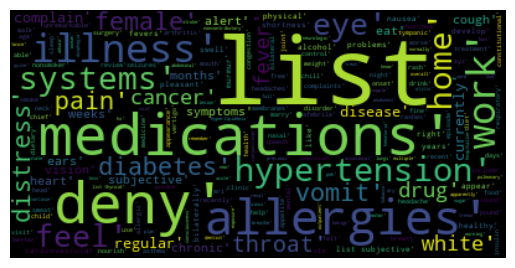

In [18]:
# find most important words for each specialty for TC and MLM with wordcloud
#import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
#create for each specialty a wordcloud
for specialty in df_mtsamples_f['medical_specialty'].unique():
    print(specialty)
    # create list of words to one string for transcription_f_TC
    # make transcription_f_TC a string
    #text = df_mtsamples_f[df_mtsamples_f['medical_specialty    == specialty]]['transcription_f_TC']

    text = df_mtsamples_f[df_mtsamples_f['medical_specialty'] == specialty]['transcription_f_TC'].values
    print(text)
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(str(text))#" ".join(text))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


# Keybert mimim

In [12]:
#load final mimic data
df = pd.read_csv('data/processed/mimic_iii/mimic_TC.csv')
df.size
# 

16

In [11]:
df.specialty.unique()
df.size

16

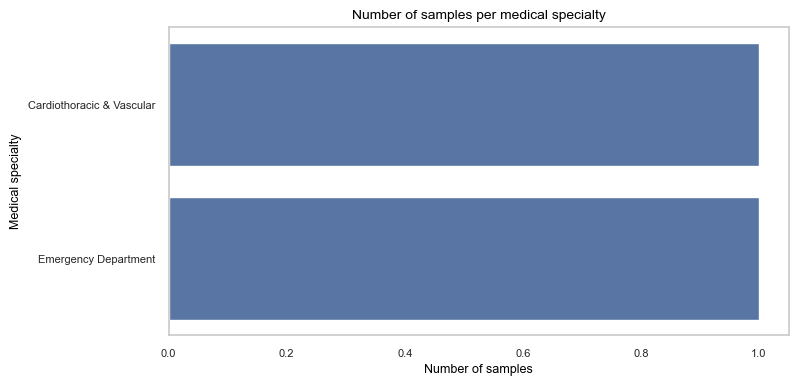

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))
df_grouped = df.groupby('specialty').count().sort_values(by='TEXT_final_cleaned', ascending=False).head(10).reset_index()
sns.barplot(x="TEXT_final_cleaned", y="specialty", data=df_grouped,
            label="Total", color="b")
# add legend
#plt.legend(ncol=2, loc="lower right", frameon=True)
# add title
plt.title("Number of samples per medical specialty", fontsize=10, color="black")
# add x and y labels
plt.xlabel("Number of samples", fontsize=9, color="black")
plt.ylabel("Medical specialty", fontsize=9, color="black")
#make labels smaller
#remove gridlines
plt.grid(False)
#make writing smaller
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# show plot
plt.show()

In [7]:
#show full text in columns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df.head()
df_f = df[['TEXT_final_cleaned', 'nr_candidates','top_n', 'healthrecord_f_TC_weights', 'healthrecord_f_TC']]
df_f.head()

TEXT_final_cleaned  \
0  hip pain woman hx SLE CKD currently HD PD labile HTN right leg pain HTN urgency ced following complaints took hydralazine dose presentation ER reportedly baseline SBPs labetolol hydralazine following unchanged complaining right hip pain ced oral dilaudid hip leg pain took itching parasthesias weakness RLE hip pain extensively worked negative LENIs Lumbar spine MRI hip plain films morphine ER floor leg hip pain somwhat morphine headache vision changes double vision chest pain Feels warm chills   
1                                                                                                                                                                                                                                                                                                           Motor cycle crash left sided rib pain driver helmeted motorcycle crash splenic lac released Hospital Hospital trasferred area Hct splenic hematoma free fluid LUQ pain Month BM flatus sob fevers chills   

   nr_candidates  top_n  \
0             30     21   
1             12      8   

                                                                                                                                                                                                                                                                                                                                                                                                                          healthrecord_f_TC_weights  \
0  [('dilaudid', 0.6026), ('labetolol', 0.5636), ('htn', 0.5479), ('pain', 0.5313), ('leg', 0.4975), ('complaints', 0.485), ('plain', 0.4633), ('sbps', 0.4531), ('unchanged', 0.4402), ('extensively', 0.4398), ('baseline', 0.4333), ('urgency', 0.4189), ('parasthesias', 0.384), ('reportedly', 0.3713), ('chest', 0.3653), ('worked', 0.3415), ('spine', 0.3387), ('floor', 0.3109), ('somwhat', 0.2964), ('hx', 0.271), ('negative', 0.2226)]   
1                                                                                                                                                                                                                                                                            [('crash', 0.8508), ('helmeted', 0.8506), ('motorcycle', 0.8444), ('driver', 0.8261), ('rib', 0.8037), ('hematoma', 0.7851), ('released', 0.7338), ('fevers', 0.5389)]   

                                                                                                                                                                                                                   healthrecord_f_TC  
0  ['dilaudid', 'labetolol', 'htn', 'pain', 'leg', 'complaints', 'plain', 'sbps', 'unchanged', 'extensively', 'baseline', 'urgency', 'parasthesias', 'reportedly', 'chest', 'worked', 'spine', 'floor', 'somwhat', 'hx', 'negative']  
1                                                                                                                                             ['crash', 'helmeted', 'motorcycle', 'driver', 'rib', 'hematoma', 'released', 'fevers']

# Raw MTsamples

In [31]:
# load raw mtsamples data
df_mtsamples = pd.read_csv('data/raw/nlp/mtsamples/mtsamples.csv')
df_mtsamples.head()

Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL HISTORY:, He has difficulty climb...   
2  HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3  2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4  1.  The left ventricular cavity size and wall ...   

                                            keywords  
0  allergy / immunology, allergic rhinitis, aller...  
1  bariatrics, laparoscopic gastric bypass, weigh...  
2  bariatrics, laparoscopic gastric bypass, heart...  
3  cardiovascular / pulmonary, 2-d m-mode, dopple...  
4  cardiovascular / pulmonary, 2-d, doppler, echo...

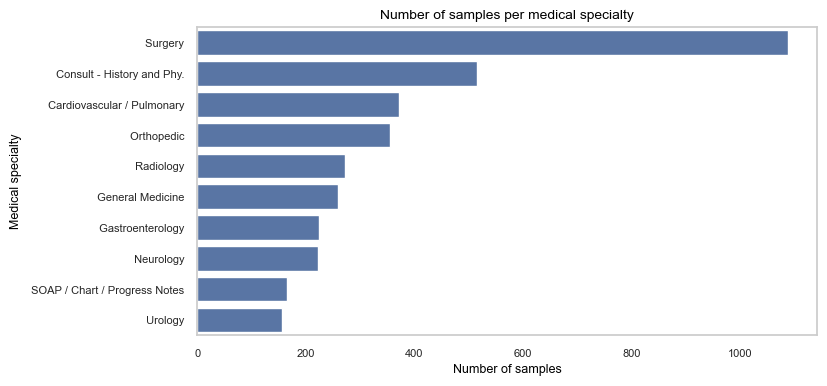

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))
df_mtsamples_grouped = df_mtsamples.groupby('medical_specialty').count().sort_values(by='transcription', ascending=False).head(10).reset_index()
sns.barplot(x="transcription", y="medical_specialty", data=df_mtsamples_grouped,
            label="Total", color="b")
# add legend
#plt.legend(ncol=2, loc="lower right", frameon=True)
# add title
plt.title("Number of samples per medical specialty", fontsize=10, color="black")
# add x and y labels
plt.xlabel("Number of samples", fontsize=9, color="black")
plt.ylabel("Medical specialty", fontsize=9, color="black")
#make labels smaller
#remove gridlines
plt.grid(False)
#make writing smaller
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# show plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="medical_specialty", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [44]:
# how many characters are in df description on average
df_mtsamples['transcription'].str.len().max()
#df_mtsamples['transcription'].str.len().hist()

18425.0

In [39]:
# how many nan values are in df description
df_mtsamples.isna().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
#create for each specialty a wordcloud
for specialty in df_mtsamples_f['medical_specialty'].unique():
    print(specialty)
    # create list of words to one string for transcription_f_TC
    # make transcription_f_TC a string
    #text = df_mtsamples_f[df_mtsamples_f['medical_specialty    == specialty]]['transcription_f_TC']

    text = df_mtsamples_f[df_mtsamples_f['medical_specialty'] == specialty]['transcription'].values
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(str(text))#" ".join(text))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()